In [743]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

loading data set

In [744]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [745]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [746]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}

In [747]:
dataframe.rename(columns=new_columns, inplace=True)

In [748]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [749]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

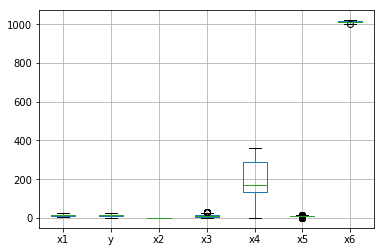

In [751]:
dataframe.boxplot()

In [752]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,500.0,13.687300,4.558239,3.722222,10.15000,13.022222,17.244444,25.044444
y,500.0,13.300889,5.129404,1.494444,10.15000,13.022222,17.244444,25.044444
x2,500.0,0.742740,0.167093,0.320000,0.62000,0.760000,0.890000,1.000000
x3,500.0,10.194134,6.764105,0.000000,4.78975,9.177000,14.063350,32.167800
x4,500.0,190.222000,103.717111,0.000000,132.75000,169.000000,289.000000,359.000000
x5,500.0,10.435118,3.708072,0.289800,9.98200,10.819200,11.447100,15.874600
x6,500.0,1013.524640,4.040835,1003.570000,1011.34500,1013.910000,1016.520000,1021.010000


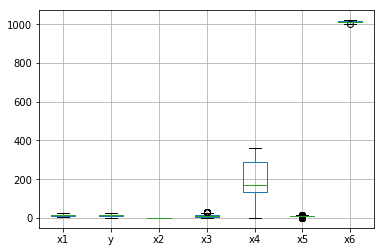

In [753]:
dataframe.boxplot()


In [754]:
# Separating the output and the parameters data frame
def separate(dataframe):
    output = dataframe.y
    return dataframe.drop('y', axis=1), output

In [755]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
def outlier(dataframe):
    spread = dataframe.describe().T
    IQR = spread['75%']-spread['25%']
    spread['outlier'] = (spread['min']<(spread['25%']-(3*IQR)))| (spread['max']>(spread['75%']+3*IQR))
    spread.ix[spread.outlier]
    return spread

In [756]:
def split(dataframe):
    test_data = dataframe.tail(300).reset_index(drop=True)
    return dataframe.head(len(dataframe)-300), test_data

In [757]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    min_col = dataframe[column_scaling].min()
    max_min_col = dataframe[column_scaling].max()-dataframe[column_scaling].min()
    print('for col= {} min= {} and max-min={} '.format(column_scaling,min_col,max_min_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - min_col) / max_min_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [758]:
Ypred = pd.Series(np.zeros(len(dataframe)))


In [759]:
np.min(Ypred)

0.0

<Figure size 432x288 with 0 Axes>

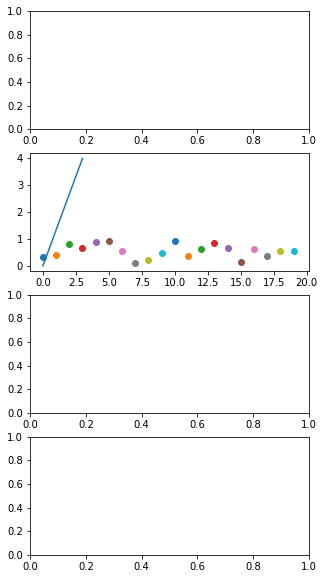

In [760]:
fig = plt.figure()
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
s = np.array(np.random.rand(20))
for i in range(20):
    ax1.scatter(i,s[i])

ax1.plot([0,3],[0,4])
plt.show()

In [761]:
class Multi_Linear_Regression():
    
    
    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 10000
        self.ncols=5
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3) = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
        
    def train(self, dataframe, output):
        weights = np.zeros(self.ncols)
        dframe_size = len(dataframe)
        bais = 0

        # Ypred = (dataframe.x1*weight1 + dataframe.x2*weight2 + dataframe.x3*weight3+ dataframe.x4*weight4 + dataframe.x5*weight5 + bais)
        
        ax1.scatter(np.linspace(np.min(output),np.max(output),len(output)),output, color='g')
        
        for iterations in range(0, self.iteration):
            Ypred = self.classify(dataframe, weights,bais)
            diff = abs(Ypred-output)
            # cost = sum(y^ -y)**2)/2m
            cost = np.sum((diff)**2)/(2*dframe_size)
            if(iterations%10==0):
                self.ax2.plot(iterations,cost, marker='x', color='r')
            for counter1 in range(0, self.ncols):
                weights[counter1] -= np.sum(diff*dataframe.loc[counter1])/dframe_size
                bais -= np.sum(diff)/dframe_size
            
        return weights, bais
        
    def classify(self, dataframe, weights, bais):
        Ypred = pd.Series(np.zeros(len(dataframe)))
        dframe_size = len(dataframe)
        for counter1 in range(0, dframe_size):
            for counter2 in range(0, self.ncols):
                Ypred[counter1] += weights[counter2]*dataframe.iloc[counter1, counter2]
            Ypred[counter1]+= bais
        return Ypred
        
    def accuracy(self,Ypred, y_output):
        for counter in range(0, len(Ypred)):
            Ypred[counter]=(abs(Ypred[counter]-y_output[counter])/y_output[counter])
    #     error_predicts = np.divide((abs(Ypred-dataframe.y)),dataframe.y)
            self.ax2.plot(counter,Ypred[counter],marker='+',color='g')
            plt.subplots_adjust(hspace=0.5, wspace = 0.5)
        plt.title("iteration vs error")
        plt.show()
        error = np.sum(Ypred)/len(Ypred)
        return (1-error)*100
                

In [762]:
def main(dataframe, test_data):
    dataframe, output = separate(dataframe)
    regression_object = Multi_Linear_Regression()
    # feature Scaling:
    weights, bais = regression_object.train(dataframe,output)
    print(weights,bais)
#     Ypred = regression_object.classify(dataframe, weights, bais)
    
    test_data, output = separate(test_data)
    Ypred = regression_object.classify(test_data,weights, bais)
    print("Accuracy = ", regression_object.accuracy(Ypred,output))

In [763]:
dataframe, test_data = split(dataframe)
# from IPython.core.debugger import Tracer; Tracer()() 

In [764]:
for item in dataframe:
    dataframe = feature_scaling_column(dataframe, item)

for col= x1 min= 3.722222222222224 and max-min=21.322222222222216 
successfully scaled column  x1
for col= y min= 1.4944444444444431 and max-min=23.549999999999997 
successfully scaled column  y
for col= x2 min= 0.32 and max-min=0.6799999999999999 
successfully scaled column  x2
for col= x3 min= 0.0 and max-min=32.1678 
successfully scaled column  x3
for col= x4 min= 0.0 and max-min=359.0 
successfully scaled column  x4
for col= x5 min= 0.2898 and max-min=15.5848 
successfully scaled column  x5
for col= x6 min= 1003.57 and max-min=17.43999999999994 
successfully scaled column  x6


In [773]:
# from IPython.core.debugger import Tracer; Tracer()()
# dataframe.isnan().sum()


0 -inf


<Figure size 432x288 with 0 Axes>

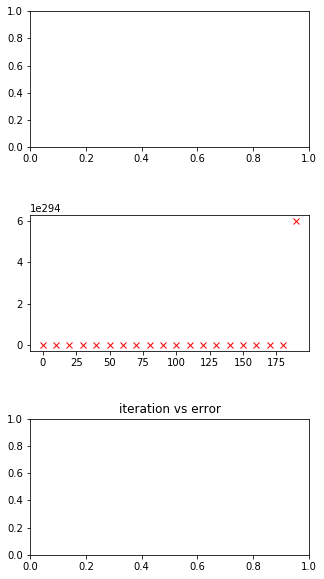

Accuracy =  -inf


In [766]:
main(dataframe,test_data)

In [767]:
dataframe.loc[0,'x1']

0.26967170401250645

In [768]:
# dataframe.x3 = dataframe.x3.between(dataframe.x3.quantile(0.1), dataframe.x3.quantile(0.9))

In [769]:
dataframe.loc[0]

x1    0.269672
y     0.250295
x2    0.838235
x3    0.438939
x4    0.699164
x5    0.996901
x6    0.662844
Name: 0, dtype: float64

In [770]:
weights = np.zeros(5)

In [771]:
Ypred = pd.Series(np.zeros(5))

In [772]:
Ypred

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64